In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import csv
import sys
import numpy as np
import cugraph as cg
import cudf, cuml
import pandas as pd
import cupy as cp

In [2]:
# maxInt = sys.maxsize
# while True:
#     # decrease the maxInt value by factor 10
#     # as long as the OverflowError occurs.
#     try:
#         csv.field_size_limit(maxInt)
#         break
#     except OverflowError:
#         maxInt = int(maxInt/10)

In [3]:
# Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,Image_url_4,Price_Crypto,Crypto,Price_USD,Name,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category

#Read Data from csv
# filename = "./data/Data_API.csv"
# with open(filename,'r', encoding='UTF-8') as f:
#      reader = csv.reader(f)
#      header = next(reader)
#      seller_address_list = []
#      buyer_address_list = []
#      category_list=[]
#      for row in reader:
#          seller_address_list.append(row[3])
#          buyer_address_list.append(row[5])
#          category_list.append(row[23])
# edge_list = list(zip(seller_address_list, buyer_address_list))

In [2]:
labels=['Art','Collectible','Games','Metaverse','Utility','Other']

In [3]:
paths={
    # "Data API":"./data/Data_API_mapped.csv",
    "Art":"./data/Art_mapped.csv",
    "Collectible":"./data/Collectible_mapped.csv",
    "Games":"./data/Games_mapped.csv",
    "Metaverse":"./data/Metaverse_mapped.csv",
    "Utility":"./data/Utility_mapped.csv",
    "Other":"./data/Other_mapped.csv"
    }

In [5]:
df_list=[]
for key in paths:
    df=cudf.read_csv(paths[key])
    df=df.iloc[:,0:2]
    df.columns = ["Seller","Buyer"]
    print(df.head())
    df_list.append(df)

   Seller  Buyer
0       2      3
1       2      4
2       5      6
3       7      8
4       5      9
   Seller  Buyer
0       0      1
1       0      1
2       2      3
3       4      5
4       3      6
   Seller  Buyer
0       0      2
1       0      1
2       0      2
3       0      2
4       0      2
   Seller  Buyer
0       2      1
1       3      1
2       4      1
3       5      1
4       6      1
   Seller  Buyer
0       2      3
1       4      5
2       4      0
3       4      0
4       4      6
   Seller  Buyer
0       2      3
1       2      1
2       4      5
3       6      7
4       6      8


In [6]:
num_nodes_list=[]
num_edges_list=[]
graphs=[]
for i,label in enumerate(labels):
    G = cg.MultiGraph()
    df=df_list[i]
    G.from_cudf_edgelist(df, source="Seller", destination="Buyer")
    graphs.append(G)
    #Ouput the number of nodes and edges
    print("----{}----".format(label))
    nodes = G.number_of_nodes()
    num_nodes_list.append(nodes)
    edges = G.number_of_edges()
    num_edges_list.append(edges)
    print("Number of nodes and edges: ",nodes,"  ",edges)

----Art----
Number of nodes and edges:  161260    1377796
----Collectible----
Number of nodes and edges:  92243    1589742
----Games----
Number of nodes and edges:  282915    2271523
----Metaverse----
Number of nodes and edges:  18330    62524
----Utility----
Number of nodes and edges:  3459    7798
----Other----
Number of nodes and edges:  48300    272704


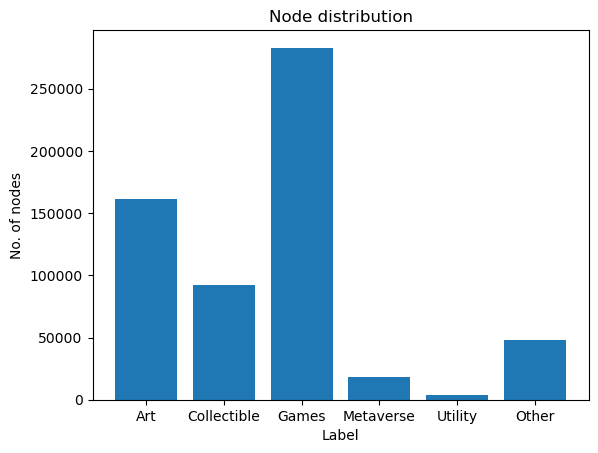

In [7]:
plt.bar(labels, num_nodes_list)
plt.title('Node distribution')
plt.xlabel('Label')
plt.ylabel('No. of nodes')
plt.show()

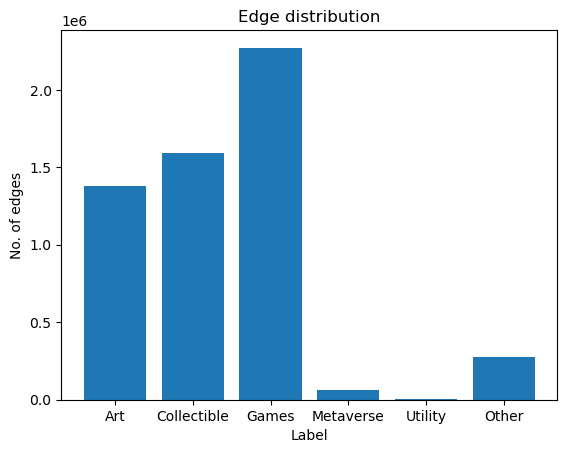

In [8]:
plt.bar(labels, num_edges_list)
plt.title('Edge distribution')
plt.xlabel('Label')
plt.ylabel('No. of edges')
plt.show()

In [13]:
avg_in_degree_list=[]
avg_out_degree_list=[]
avg_degree_list=[]
list_of_degree_list=[]

for i,graph in enumerate(graphs):
    sum_of_in_degree=0
    sum_of_out_degree=0
    degree_list=[]
    for j,node in enumerate(graph.nodes().to_numpy()):
        temp_in=graph.in_degree(node).to_numpy()[0][1]
        temp_out=graph.out_degree(node).to_numpy()[0][1]
        sum_of_in_degree+=temp_in
        sum_of_out_degree+=temp_out

        degree_list.append(temp_in+temp_out)
        if j%1000==0:
            print('----{} nodes----'.format(j))

    divisor=num_nodes_list[i]
    avg_out_degree=sum_of_out_degree/divisor
    avg_in_degree=sum_of_in_degree/divisor
    avg_degree=(sum_of_in_degree+sum_of_out_degree)/divisor

    print("Category: {}".format(labels[i]))
    print("Average in-degree: ",avg_in_degree)
    avg_in_degree_list.append(avg_in_degree)

    print("Average out-degree: ",avg_out_degree)
    avg_out_degree_list.append(avg_out_degree)

    print("Average degree: ",avg_degree)
    avg_degree_list.append(avg_degree)
    degree_list=cp.array(degree_list)
    list_of_degree_list.append(degree_list)


----0 nodes----
----1000 nodes----
----2000 nodes----
----3000 nodes----
----4000 nodes----
----5000 nodes----
----6000 nodes----
----7000 nodes----
----8000 nodes----
----9000 nodes----
----10000 nodes----
----11000 nodes----
----12000 nodes----
----13000 nodes----
----14000 nodes----
----15000 nodes----
----16000 nodes----
----17000 nodes----
----18000 nodes----
----19000 nodes----
----20000 nodes----
----21000 nodes----
----22000 nodes----
----23000 nodes----
----24000 nodes----
----25000 nodes----
----26000 nodes----
----27000 nodes----
----28000 nodes----
----29000 nodes----
----30000 nodes----
----31000 nodes----
----32000 nodes----
----33000 nodes----
----34000 nodes----
----35000 nodes----
----36000 nodes----
----37000 nodes----
----38000 nodes----
----39000 nodes----
----40000 nodes----
----41000 nodes----
----42000 nodes----
----43000 nodes----
----44000 nodes----
----45000 nodes----
----46000 nodes----
----47000 nodes----
----48000 nodes----
----49000 nodes----
----50000 nod

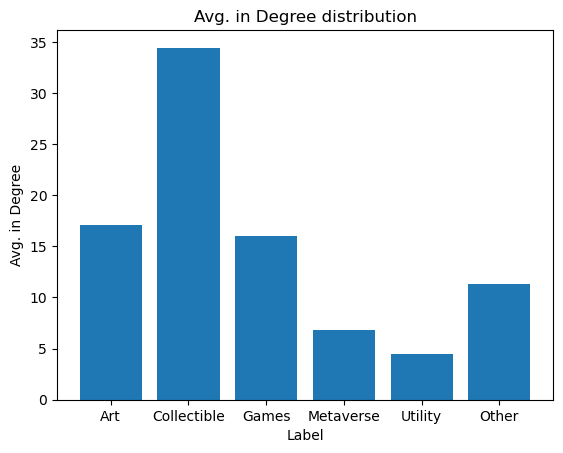

In [14]:
plt.bar(labels, avg_in_degree_list)
plt.title('Avg. in Degree distribution')
plt.xlabel('Label')
plt.ylabel('Avg. in Degree')
plt.show()

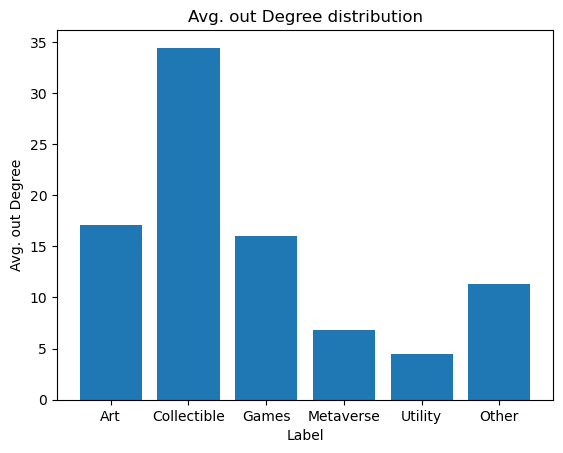

In [15]:
plt.bar(labels, avg_out_degree_list)
plt.title('Avg. out Degree distribution')
plt.xlabel('Label')
plt.ylabel('Avg. out Degree')
plt.show()

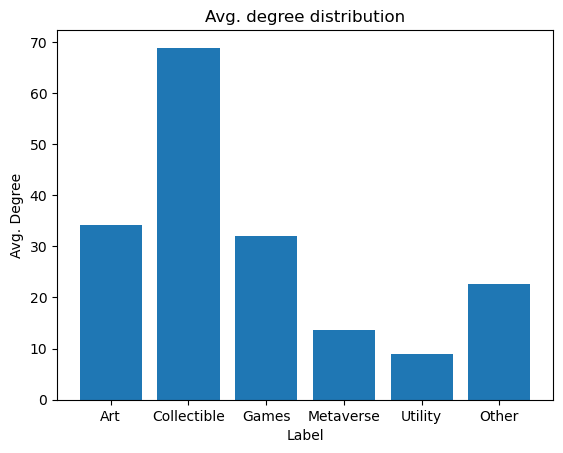

In [16]:
plt.bar(labels, avg_degree_list)
plt.title('Avg. degree distribution')
plt.xlabel('Label')
plt.ylabel('Avg. Degree')
plt.show()

Text(0, 0.5, 'Count,P(K)*n')

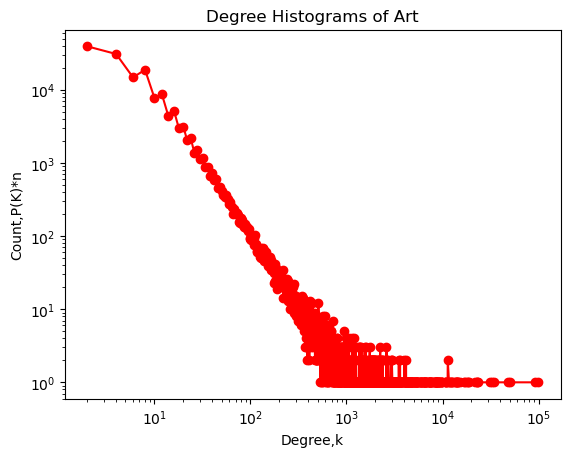

In [31]:
from collections import Counter
degree_list=list_of_degree_list[0]
degrees, degree_freq = np.unique(degree_list, return_counts=True)
#log-log
plt.title("Degree Histograms of {}".format(labels[0]))
plt.loglog(degrees.get(),degree_freq.get(),'ro-')
plt.xlabel('Degree,k')
plt.ylabel('Count,P(K)*n')

Text(0, 0.5, 'Count,P(K)*n')

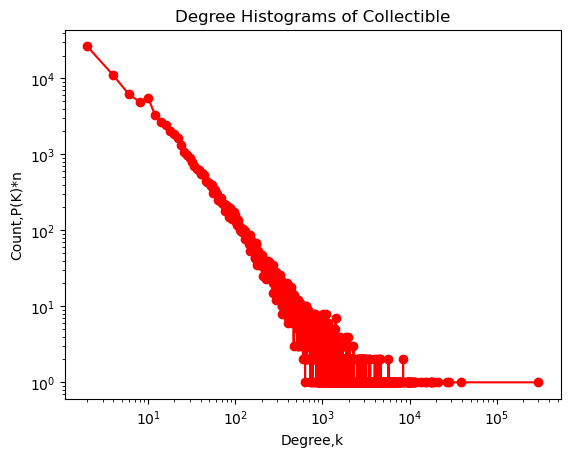

In [32]:
degree_list=list_of_degree_list[1]
degrees, degree_freq = np.unique(degree_list, return_counts=True)
#log-log
plt.title("Degree Histograms of {}".format(labels[1]))
plt.loglog(degrees.get(),degree_freq.get(),'ro-')
plt.xlabel('Degree,k')
plt.ylabel('Count,P(K)*n')

Text(0, 0.5, 'Count,P(K)*n')

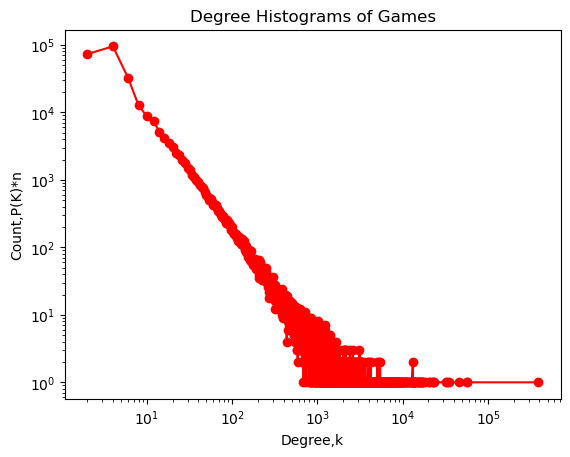

In [33]:
degree_list=list_of_degree_list[2]
degrees, degree_freq = np.unique(degree_list, return_counts=True)
#log-log
plt.title("Degree Histograms of {}".format(labels[2]))
plt.loglog(degrees.get(),degree_freq.get(),'ro-')
plt.xlabel('Degree,k')
plt.ylabel('Count,P(K)*n')

Text(0, 0.5, 'Count,P(K)*n')

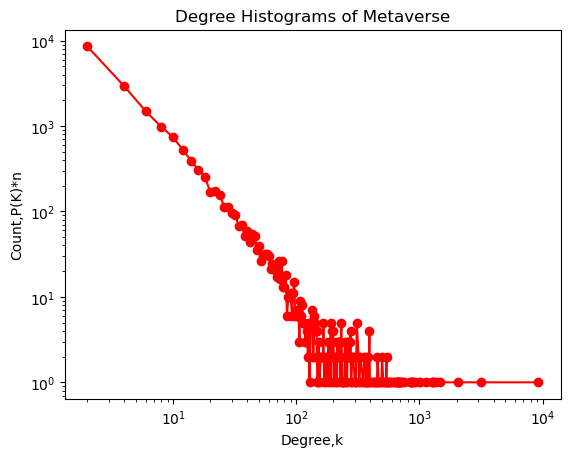

In [34]:
degree_list=list_of_degree_list[3]
degrees, degree_freq = np.unique(degree_list, return_counts=True)
#log-log
plt.title("Degree Histograms of {}".format(labels[3]))
plt.loglog(degrees.get(),degree_freq.get(),'ro-')
plt.xlabel('Degree,k')
plt.ylabel('Count,P(K)*n')

Text(0, 0.5, 'Count,P(K)*n')

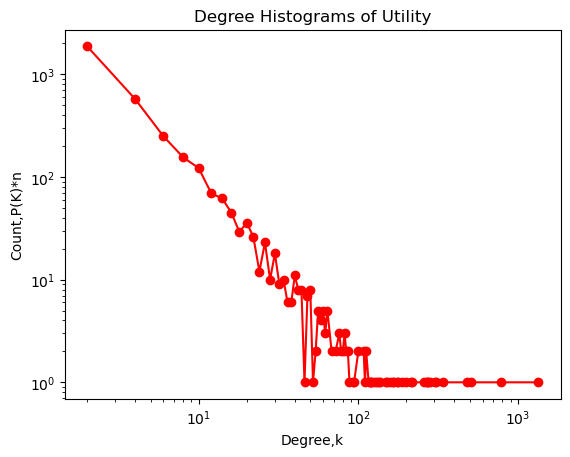

In [35]:
degree_list=list_of_degree_list[4]
degrees, degree_freq = np.unique(degree_list, return_counts=True)
#log-log
plt.title("Degree Histograms of {}".format(labels[4]))
plt.loglog(degrees.get(),degree_freq.get(),'ro-')
plt.xlabel('Degree,k')
plt.ylabel('Count,P(K)*n')

In [ ]:
# compute distance
for graph in graphs:
    dis_seq = []
    path_len = cg.sssp(graph)

    for s, s2t in path_len:
        dis_seq += list(s2t.values())
    dis_counts = Counter(dis_seq)
    dis_freq = [dis_counts.get(d,0) for d in range(max(dis_counts)+1)]
    dis = range(len(dis_freq))

    #log-log
    plt.title("Path Distance of {}".format(labels[0]))
    plt.loglog(dis,dis_freq,'ro-')
    plt.xlabel('Distance (hops)')
    plt.ylabel('Number of paths')
    #Calculate average path
    avg_path=sum(dis_seq)/(len(dis_seq)-nodes)
    print(avg_path)

Text(0, 0.5, 'Count,P(K)*n')

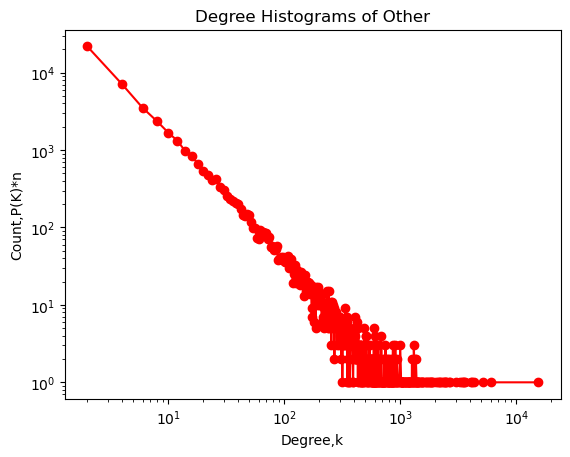

In [36]:
degree_list=list_of_degree_list[5]
degrees, degree_freq = np.unique(degree_list, return_counts=True)
#log-log
plt.title("Degree Histograms of {}".format(labels[5]))
plt.loglog(degrees.get(),degree_freq.get(),'ro-')
plt.xlabel('Degree,k')
plt.ylabel('Count,P(K)*n')

In [23]:
G_weighted=nx.DiGraph()
for u,v in G.edges():
    if G_weighted.has_edge(u,v):
        G_weighted[u][v]['weight'] += 1
    else:
        G_weighted.add_edge(u, v, weight=1)

In [24]:
coef = nx.clustering(G_weighted)
coef = np.array(list(coef.values()))

degree_unique = np.unique(degree_list)
coef_degree_list = []

for d in np.unique(degree_unique):
  mask_d = (degree_list == d)
  coef_degree = coef[mask_d].mean()
  coef_degree_list.append(coef_degree)

Text(0, 0.5, 'Ck (Clustering coefficient)')

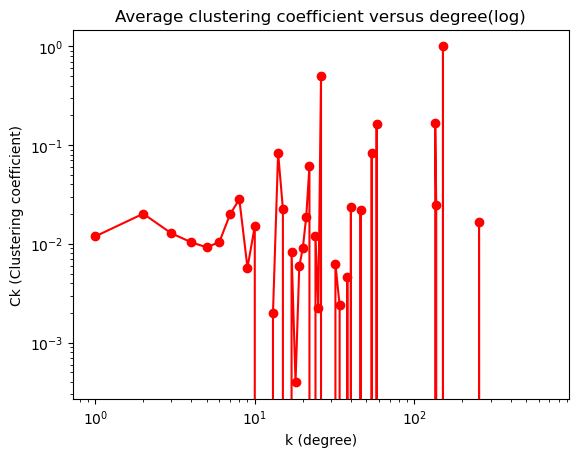

In [25]:
#log-log
plt.title("Average clustering coefficient versus degree(log)")
plt.loglog(degree_unique,coef_degree_list,'ro-')
plt.xlabel('k (degree)')
plt.ylabel('Ck (Clustering coefficient)')

0


Text(0, 0.5, 'number of connected components')

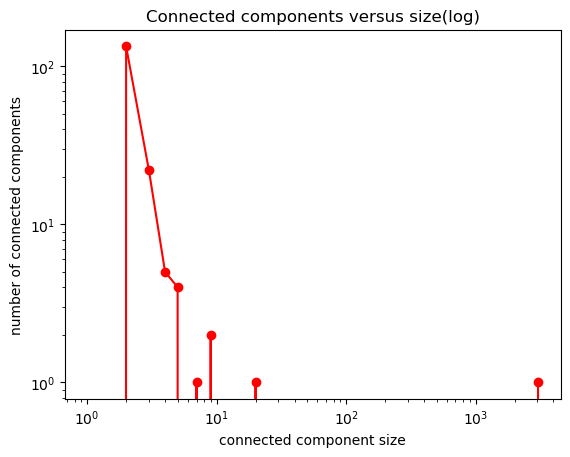

In [20]:
G_undirected=G.to_undirected()
component_list = list(nx.connected_components(G_undirected))
component_size_list = [len(_component) for _component in component_list]

component_count = Counter(component_size_list)
component_freq = [component_count.get(i,0) for i in range(max(component_count)+1)]
component_size = range(len(component_freq))
#log-log
print(component_count.get(0,0))
plt.title("Connected components versus size(log)")
plt.loglog(component_size ,component_freq,'ro-')
plt.xlabel('connected component size')
plt.ylabel('number of connected components')

In [32]:
out_degree_centrality = nx.out_degree_centrality(G)
in_degree_centrality = nx.in_degree_centrality(G)

print("Out-degree centrality:", out_degree_centrality)
print("In-degree centrality:", in_degree_centrality)

Out-degree centrality: {'0': 0.0002891844997108155, '1': 0.0002891844997108155, '2': 0.0002891844997108155, '3': 0.0, '4': 0.0037593984962406013, '5': 0.0, '6': 0.0, '7': 0.0, '8': 0.0, '9': 0.009832272990167727, '10': 0.0002891844997108155, '11': 0.0, '12': 0.000578368999421631, '13': 0.0, '14': 0.0, '15': 0.0031810294968189702, '16': 0.0, '17': 0.0, '18': 0.0, '19': 0.0002891844997108155, '20': 0.0, '21': 0.11336032388663966, '22': 0.0, '23': 0.0017351069982648928, '24': 0.0, '25': 0.0, '26': 0.0002891844997108155, '27': 0.0, '28': 0.031521110468478886, '29': 0.000578368999421631, '30': 0.0, '31': 0.0, '32': 0.0, '33': 0.0, '34': 0.0002891844997108155, '35': 0.0, '36': 0.0, '37': 0.0, '38': 0.0, '39': 0.0, '40': 0.0, '41': 0.0, '42': 0.0, '43': 0.029786003470213995, '44': 0.0, '45': 0.0, '46': 0.0002891844997108155, '47': 0.0, '48': 0.0, '49': 0.005205320994794678, '50': 0.0, '51': 0.0, '52': 0.0, '53': 0.0, '54': 0.0, '55': 0.000578368999421631, '56': 0.002602660497397339, '57': 0.0

In [33]:
betweenness_centrality = nx.betweenness_centrality(G)
print("Betweenness centrality:", betweenness_centrality)

Betweenness centrality: {'0': 8.36518656959258e-08, '1': 8.36518656959258e-08, '2': 0.0, '3': 0.0, '4': 0.0, '5': 0.0, '6': 0.0, '7': 0.0, '8': 0.0, '9': 0.0, '10': 4.18259328479629e-08, '11': 0.0, '12': 0.0, '13': 0.0, '14': 0.0, '15': 0.0, '16': 0.0, '17': 0.0, '18': 0.0, '19': 0.0, '20': 0.0, '21': 0.0, '22': 0.0, '23': 0.0, '24': 0.0, '25': 0.0, '26': 0.0, '27': 0.0, '28': 0.0, '29': 0.0, '30': 0.0, '31': 0.0, '32': 0.0, '33': 0.0, '34': 0.0, '35': 0.0, '36': 0.0, '37': 0.0, '38': 0.0, '39': 0.0, '40': 0.0, '41': 0.0, '42': 0.0, '43': 4.140767351948327e-06, '44': 0.0, '45': 0.0, '46': 2.509555970877774e-07, '47': 0.0, '48': 0.0, '49': 5.562849068779066e-06, '50': 0.0, '51': 0.0, '52': 0.0, '53': 0.0, '54': 0.0, '55': 0.0, '56': 1.212952052590924e-06, '57': 0.0, '58': 0.0, '59': 1.5057335825266644e-06, '60': 0.0, '61': 0.0, '62': 0.0, '63': 0.0, '64': 1.673037313918516e-07, '65': 0.0, '66': 0.0, '67': 0.0, '68': 0.0, '69': 0.0, '70': 0.0, '71': 0.0, '72': 0.0, '73': 0.0, '74': 0.0, 

In [34]:
constraint_centrality = nx.constraint(G)
print("Constraint centrality:", constraint_centrality)

Constraint centrality: {'0': 0.5, '1': 0.5, '2': 1.0, '3': nan, '4': 0.16666666666666669, '5': nan, '6': nan, '7': nan, '8': nan, '9': 0.05163992351113186, '10': 0.5, '11': nan, '12': 0.5, '13': nan, '14': nan, '15': 0.09469931223177977, '16': nan, '17': nan, '18': nan, '19': 1.0, '20': nan, '21': 0.009033288022481663, '22': nan, '23': 0.25, '24': nan, '25': nan, '26': 1.0, '27': nan, '28': 0.012658227848101281, '29': 0.4752559375980172, '30': nan, '31': nan, '32': nan, '33': nan, '34': 0.8159129297977694, '35': nan, '36': nan, '37': nan, '38': nan, '39': nan, '40': nan, '41': nan, '42': nan, '43': 0.02244471690068839, '44': nan, '45': nan, '46': 0.34753880556169725, '47': nan, '48': nan, '49': 0.06479585838548674, '50': nan, '51': nan, '52': nan, '53': nan, '54': nan, '55': 0.4482497647585111, '56': 0.1797971363923265, '57': nan, '58': nan, '59': 0.25, '60': nan, '61': nan, '62': nan, '63': nan, '64': 0.3112866038327652, '65': nan, '66': nan, '67': 1.0, '68': nan, '69': nan, '70': 0.0

In [35]:
nx_close_centrality = nx.closeness_centrality(G)
print('closeness centrality:', nx_close_centrality)

closeness centrality: {'0': 0.0002891844997108155, '1': 0.00038557933294775394, '2': 0.0, '3': 0.0009253903990746096, '4': 0.0, '5': 0.0002891844997108155, '6': 0.0002891844997108155, '7': 0.0002891844997108155, '8': 0.0002891844997108155, '9': 0.0, '10': 0.0002891844997108155, '11': 0.0002891844997108155, '12': 0.0, '13': 0.0008675534991324465, '14': 0.0002891844997108155, '15': 0.0, '16': 0.0002891844997108155, '17': 0.0002891844997108155, '18': 0.001156737998843262, '19': 0.0, '20': 0.0002891844997108155, '21': 0.0, '22': 0.0002891844997108155, '23': 0.0, '24': 0.0014459224985540775, '25': 0.001156737998843262, '26': 0.0, '27': 0.000578368999421631, '28': 0.0, '29': 0.0002891844997108155, '30': 0.0008675534991324465, '31': 0.0002891844997108155, '32': 0.0002891844997108155, '33': 0.000578368999421631, '34': 0.0002891844997108155, '35': 0.000578368999421631, '36': 0.0002891844997108155, '37': 0.0002891844997108155, '38': 0.0002891844997108155, '39': 0.0002891844997108155, '40': 0.001

In [31]:
nx_eigen_centrality = nx.eigenvector_centrality(G_weighted,max_iter=10000).values()
print('eigenvector centrality:', nx_eigen_centrality)

eigenvector centrality: dict_values([1.74080205584002e-121, 2.0455161784109983e-119, 1.5959658495381504e-117, 7.376279897627199e-124, 7.376279897627199e-124, 1.74080205584002e-121, 1.74080205584002e-121, 1.74080205584002e-121, 1.74080205584002e-121, 7.376279897627199e-124, 1.74080205584002e-121, 1.74080205584002e-121, 1.74080205584002e-121, 6.941079383667179e-121, 1.0407930935551963e-120, 1.74080205584002e-121, 1.74080205584002e-121, 1.74080205584002e-121, 1.74080205584002e-121, 5.207653607724807e-121, 1.74080205584002e-121, 1.74080205584002e-121, 1.74080205584002e-121, 1.74080205584002e-121, 4.27637387825367e-52, 4.27637387825367e-52, 1.2203391225433408e-118, 1.74080205584002e-121, 1.74080205584002e-121, 4.27637387825367e-52, 1.74080205584002e-121, 1.4231499383286013e-118, 7.376279897627199e-124, 5.207653607724807e-121, 1.74080205584002e-121, 7.376279897627199e-124, 1.74080205584002e-121, 1.6167669588494615e-117, 1.74080205584002e-121, 9.477436166696795e-116, 9.453064200287039e-116, 1